<a href="https://colab.research.google.com/github/romankova27/telecom/blob/main/Biomic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Установка библиотеки OpenCV с помощью pip
!pip install opencv-python

# Импорт необходимых модулей
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

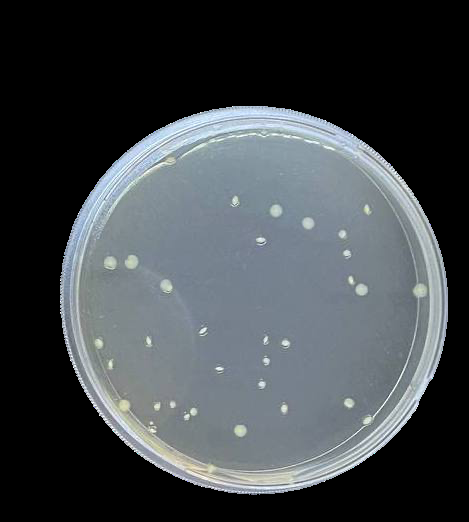

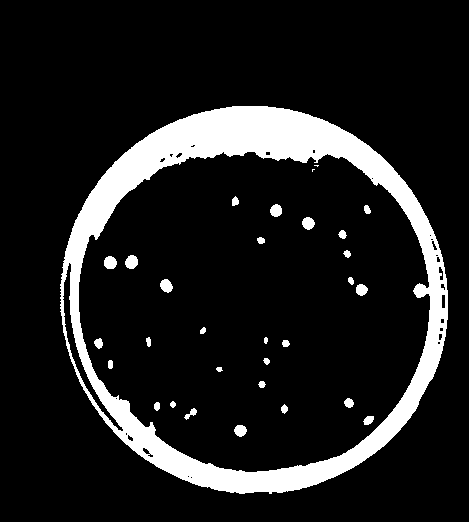

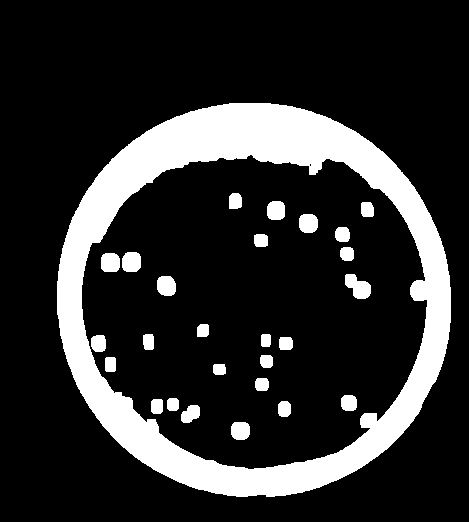

In [2]:
# Загрузка изображения
img = cv2.imread('/content/photo_2024-05-21 15.41.53-Photoroom.png-Photoroom.png')
# Отображение исходного изображения
cv2_imshow(img)
# Применение медианного фильтра для сглаживания изображения и уменьшения шума
img = cv2.medianBlur(img,5)
# Преобразование изображения в оттенки серого
cimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Применение бинаризации для получения двоичного изображения
_, cimg = cv2.threshold(cimg, 150, 255, cv2.THRESH_BINARY)
cimg_copy= cimg.copy()
cv2_imshow(cimg)

# Расширение белых областей на изображении
kernel = np.ones((7, 7), 'uint8')
cimg = cv2.dilate(cimg, kernel, iterations=1)
cv2_imshow(cimg)

# Поиск контуров на расширенном изображении
contours, hierarchy = cv2.findContours(cimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_copy = img.copy()



Основные площади:  [274.0, 224.0, 162.5, 147.5, 124.0, 203.5, 144.0, 113.5, 138.0, 133.0, 148.0, 200.5, 105.0, 141.5, 125.0, 298.0, 382.5, 297.5, 308.0, 151.5, 147.0, 174.5, 287.5, 156.5, 277.5, 166.0]


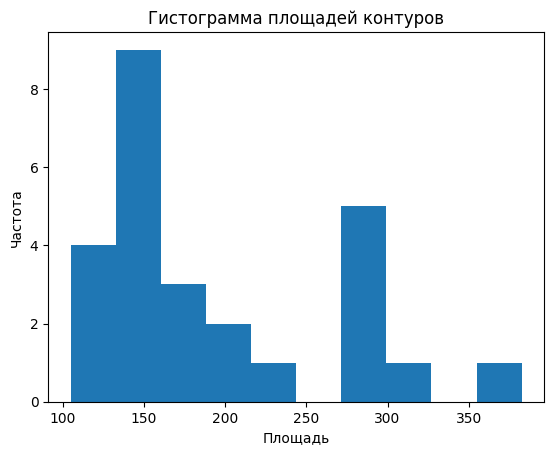

In [3]:
# Создаем списки для хранения площадей контуров
min_area = []
max_area = []
n_area = []

# Проходим по всем контурам, проверяем площадь контура и добавляем в соответствующий список
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 20000:
      max_area.append(area)
    elif area <= 50:
      min_area.append(area)
    else:
      n_area.append(area)
# Выводим основные площади, не входящие в предыдущие категории
print('Основные площади: ', n_area)

# Строим гистограмму для основных площадей
plt.hist(n_area)
plt.xlabel('Площадь')
plt.ylabel('Частота')
plt.title('Гистограмма площадей контуров')
plt.show()

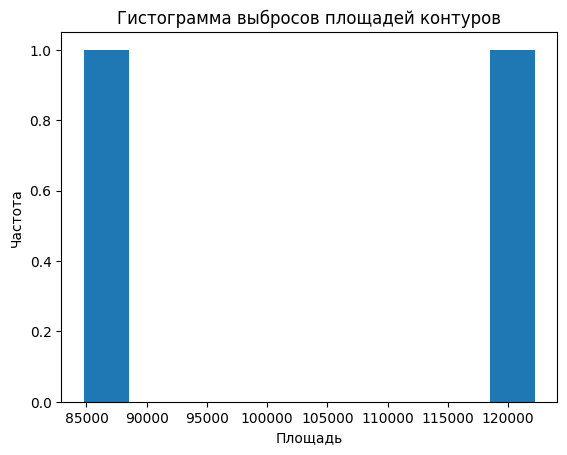

In [4]:
# Строим гистограмму для выбросов
plt.hist(max_area)
plt.xlabel('Площадь')
plt.ylabel('Частота')
plt.title('Гистограмма выбросов площадей контуров')
plt.show()

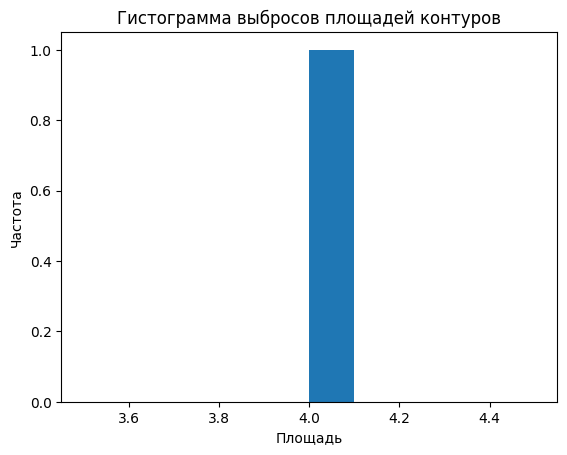

In [5]:
# Строим гистограмму для выбросов
plt.hist(min_area)
plt.xlabel('Площадь')
plt.ylabel('Частота')
plt.title('Гистограмма выбросов площадей контуров')
plt.show()

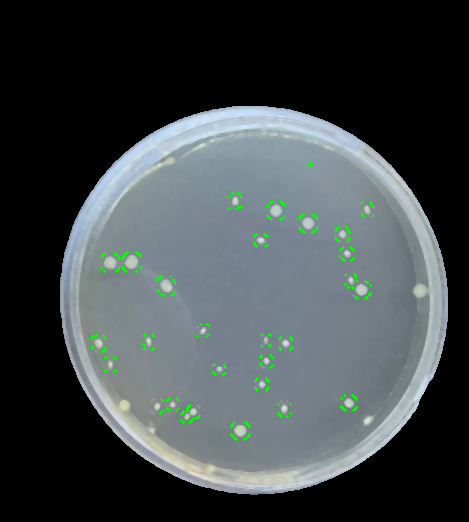

In [6]:
max_area = 20000 # Максимальная площадь контура
min_area = 0 # Минимальная площадь контура

# Создаем список отфильтрованных контуров, удовлетворяющих условиям площади
filtered_contours = [i for i in contours if min_area <= cv2.contourArea(i) <= max_area]


# Рисуем отфильтрованные контуры на изображении
for contour in filtered_contours:
    cv2.drawContours(img_copy, contour, -1, (0,255,0), 2)

cv2_imshow(img_copy)

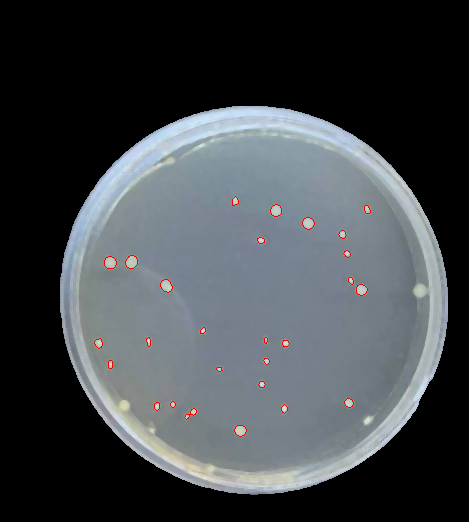

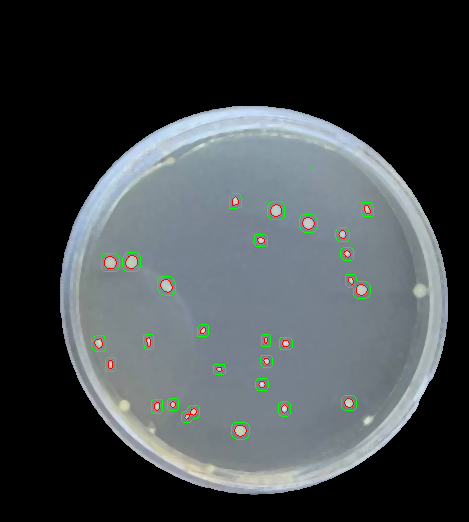

In [7]:
# Перебор контуров и отображение каждого
for i, contour in enumerate(filtered_contours):
    # Создание маски для контура
    mask = np.zeros_like(cimg_copy)  # создаем черное изображение того же размера
    cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)

    # Применение маски к исходному изображению
    result = cv2.bitwise_and(cimg_copy, cimg_copy, mask=mask)

    # Выделение области с контуром
    x, y, w, h = cv2.boundingRect(contour)
    cropped = result[y:y+h, x:x+w]
    _, cropped_with_tresh = cv2.threshold(cropped, 150, 255, cv2.THRESH_BINARY)

    # Нахождение новых контуров в выделенной области
    new_contours, hierarchy = cv2.findContours(cropped_with_tresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(cropped_with_tresh, new_contours, -1, (0,0,255), 1)

    # Фильтрация новых контуров по размеру
    s_tresh = 10
    filtered_contours_2 = [contour for contour in new_contours if cv2.contourArea(contour) > s_tresh]
    # Смещение координат новых контуров обратно к исходным координатам
    for i in filtered_contours_2:
        for j, _ in enumerate(i):
          i[j][0][0] += x
          i[j][0][1] += y
    # Отображение отфильтрованных новых контуров на изображении
    cv2.drawContours(img, filtered_contours_2, -1, (0,0,255), 1)
cv2_imshow(img)
# Отображение исходных отфильтрованных контуров на изображении
cv2.drawContours(img, filtered_contours, -1, (0,255,0), 1)
cv2_imshow(img)